# generate the 2D grid plot for fine tune result


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [8]:
fmt = '.3f'
cmap = 'tab20b'
# cmap = 'jet'
v_min = 0
v_max = 5


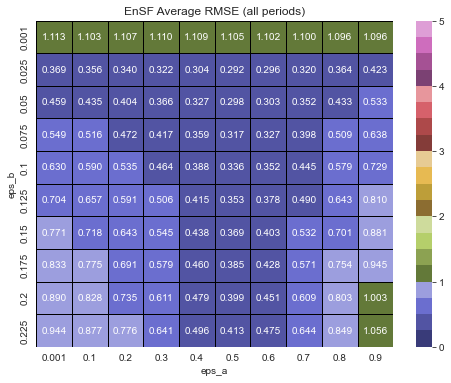

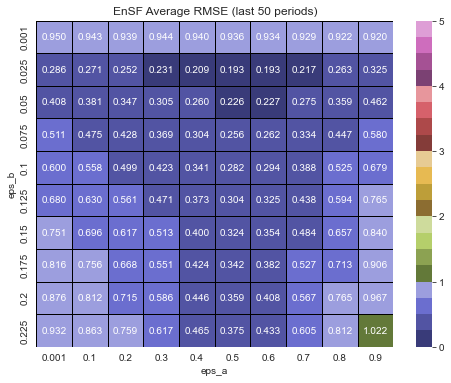

In [9]:
# EnSF grid
data_name_all = ['rmse_EnSF', 'final_rmse_EnSF']
title_all = ['EnSF Average RMSE (all periods)', 'EnSF Average RMSE (last 50 periods)']
save_all = ['EnSF_mean_rmse', 'EnSF_final_rmse']
for k,data_name in enumerate(data_name_all):
    data = pd.read_csv(f'{data_name}.csv')

    name_c1 = 'eps_b'
    c1 = [0.001, 0.025, 0.05, 0.075, 0.100, 0.125, 0.150, 0.175, 0.200, 0.225] # eps_b

    name_c2 = 'eps_a'
    c2 = [0.001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # eps_a

    data_2d = np.zeros((len(c1), len(c2)))
    for i, c1_v in enumerate(c1):
        for j, c2_v in enumerate(c2):
            value = data[(data[name_c1] == c1_v) & (data[name_c2] == c2_v)]['rmse_mean'].item()
            data_2d[i,j] = value

    data_2d = pd.DataFrame(data_2d, index=c1, columns=c2)

    plt.figure(figsize=(8,6))
    ax = sns.heatmap(data_2d, annot=True, fmt=fmt, cmap=cmap,linewidths=1, linecolor='black',vmin=v_min, vmax=v_max)

    ax.set_xlabel(name_c2)
    ax.set_ylabel(name_c1)
    ax.set_title(title_all[k])
    plt.savefig(f'{save_all[k]}.png', dpi=200)
    plt.show()